In [2]:
import math
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'Casos covid por provincias.xlsx'
df = pd.read_excel(url)
df = df.replace(np.nan, 0)
df=df[df['Provincia']=="Chimborazo"]
casos=df.iloc[0].loc["19/3/2020"]
df


,Provincia,16/3/2020,17/3/2020,18/3/2020,19/3/2020,20/3/2020,21/3/2020,22/3/2020,23/3/2020,24/3/2020,...,13/4/2020,14/4/2020,15/4/2020,16/4/2020,17/4/2020,18/4/2020,19/4/2020,20/4/2020,21/04/2020,22/04/2020
4,Chimborazo,0.0,0.0,0.0,2.0,3.0,4.0,9.0,9.0,11.0,...,85,86,90,99,105,108,112,116,121,124


In [4]:
yR=list(df.iloc[0,:])
for i in range(4):
    yR.pop(0)
print(yR)

xR=list(range(1,len(yR)+1))


[2.0, 3.0, 4.0, 9.0, 9.0, 11.0, 11.0, 11.0, 11.0, 15.0, 15.0, 15.0, 17, 18, 24, 25, 31, 32, 46, 50, 51, 54, 65, 65, 74, 85, 86, 90, 99, 105, 108, 112, 116, 121, 124]


In [6]:
regr = linear_model.LinearRegression()
regr.fit(np.array(xR).reshape(-1, 1) ,yR)
print('Coefficients: \n', regr.coef_)
print('Independent term: \n', regr.intercept_)

Coefficients: 
 [3.84733894]
Independent term: 
 -20.280672268907573


### Modelo Lineal

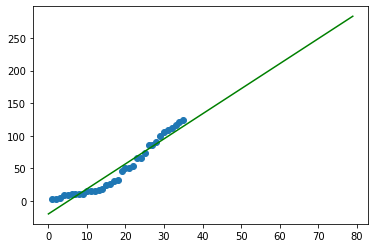

Casos en una semana:  114.37619047619049


In [7]:
plt.scatter(xR, yR)
x_real = np.array(range(0, 80))
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='green')
prediccion=regr.predict(x_real.reshape(-1, 1))
plt.plot(42,prediccion[42],color='red')
plt.show()
print("Casos en una semana: ",prediccion[35])

### Modelo Logistico

In [8]:
def modelo_logistico(x,a,b):
    return a+b*np.log(x)

exp_fit = curve_fit(modelo_logistico,xR,yR) #Extraemos los valores de los paramatros
print(exp_fit)

(array([-51.01146891,  37.98075394]), array([[182.77356792, -62.86560322],
       [-62.86560322,  23.88091441]]))


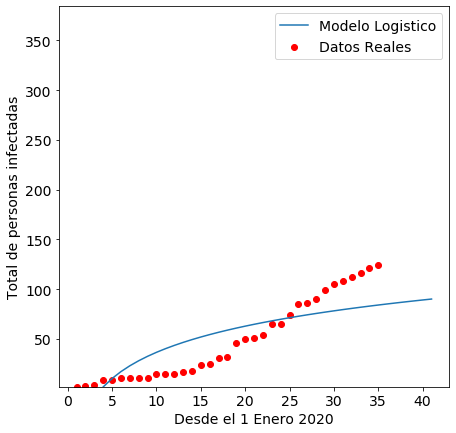

In [7]:
pred_x = list(range(1,42))# Predecir 50 dias mas
plt.rcParams['figure.figsize'] = [7, 7]
plt.rc('font', size=14)
# Real data
plt.scatter(xR,yR,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [modelo_logistico(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Logistico" )
plt.legend()
plt.xlabel("Desde el 1 Enero 2020")
plt.ylabel("Total de personas infectadas")
plt.ylim((min(yR)*0.9,max(yR)*3.1)) # Definir los limites de Y
plt.show()

### Modelo Exponencial

In [8]:
c=-2
#def  exponencial ( x ,  a ,  b ,  c ): 
#    return a * np . exp ( - b * x ) + c
#exp_fit = curve_fit ( exponencial ,  xR ,  yR ,  p0 = ( 1 ,  1e-6 ,  1 ))
#print(exp_fit)

def exponencial(x, a, b):
    return a * np . exp ( - b * (x  + c))

exp_fit = curve_fit(exponencial,xR,yR)
print(exp_fit)

(array([10.75138085, -0.07816025]), array([[1.16161083e+00, 3.78490417e-03],
       [3.78490417e-03, 1.29249363e-05]]))


Casos en una semana: 226.62208622623115


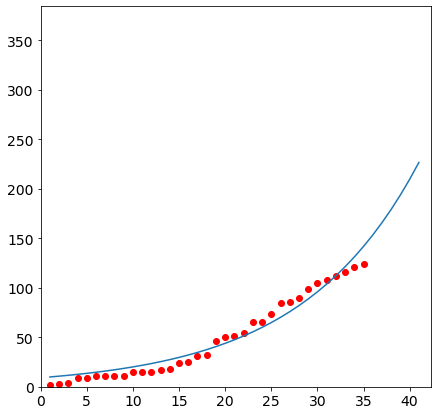

In [9]:
pred_x = list(range(1,42))# Predecir 7 dias mas
plt.scatter(xR,yR,label="Datos Reales",color="red")
# Predicted exponential curve
plt.plot(pred_x, [exponencial(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x], label="Modelo Exponencial" )
plt.xlim(0, max(xR)*1.21)
plt.ylim(0, max(yR)*3.1)

casos=pred_x, [exponencial(i,exp_fit[0][0],exp_fit[0][1]) for i in pred_x]
print('Casos en una semana:',casos[1][40])

plt.show()

### Modelo Polinomial

In [10]:
xp = np.array(range(min(xR),max(xR)+100))
grado=6
model = LinearRegression()
poly = PolynomialFeatures(degree=grado, include_bias=False)
x_poly = poly.fit_transform(np.array(xR).reshape(-1, 1))
model.fit(x_poly, yR)
y_pred = model.predict(x_poly)
rl = LinearRegression()
rl.fit(x_poly, yR) 
casos = poly.fit_transform(np.array(xp).reshape(-1, 1))
prediccion = rl.predict(casos)
print ('Predicción en una semana:', prediccion[42])
rmse = np.sqrt(mean_squared_error(yR,y_pred))
r2 = r2_score(yR,y_pred)
print('w= ',model.coef_,'\nb= ',model.intercept_,'\nRMSE: ' + str(rmse),'\nR2: ' + str(r2))

Predicción en una semana: 176.52142972251673
w=  [ 5.05431862e+00 -6.84040908e-01  3.95689480e-02 -3.82044675e-04
 -1.59819106e-05  2.74831386e-07] 
b=  -3.7294249727823043 
RMSE: 2.067656948257454 
R2: 0.9973515945482675


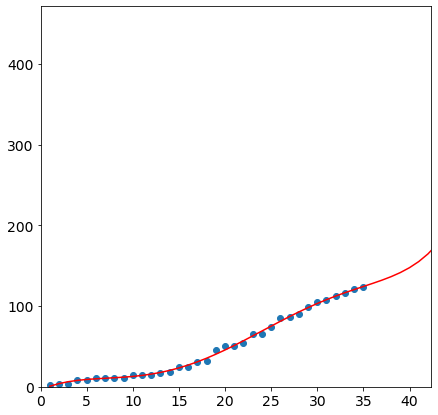

In [11]:
sols = {}
for grado in range(grado,grado+1):
  z = np.polyfit(xR, yR, grado, full=True)
  sols[grado] = z
    
xp = np.array(range(min(xR),max(xR)+100))
for grado, sol in sols.items():
  coefs, error, *_ = sol
  p = np.poly1d(coefs)

plt.scatter(xR, yR)
plt.plot(xp, p(xp), color='r')

plt.xlim(0, max(xR)*1.21)
plt.ylim(0, max(yR)*3.8)
plt.show()

### Modelo SIR

In [7]:
# 1. Implementar solo teniendo en cuenta los casos confirmados
import numpy as np
import pandas as pd
from csv import reader
from csv import writer
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import argparse
import sys
import json
import ssl
import urllib.request

class Learner(object):
    def __init__(self, country, loss, start_date,s_0, i_0, r_0):
        self.country = country
        self.loss = loss
        self.start_date = start_date
        self.s_0 = s_0
        self.i_0 = i_0
        self.r_0 = r_0
        self.Beta = 0
        self.Gamma = 0
        self.R0=0

    def train(self):
        data = yR
        self.i0=data[-1]
        optimal = minimize(loss, [0.001, 0.001], args=(data, self.s_0, self.i_0, self.r_0), method='L-BFGS-B', bounds=[(0.00000001, 0.85), (0.00000001, 0.45)])
        beta, gamma = optimal.x
        self.Beta, self.Gamma = optimal.x
        #new_index, extended_actual, prediction = self.predict(beta, gamma, data, self.country, self.s_0, self.i_0, self.r_0)
        df = pd.DataFrame(yR)
        self.R0=(beta/gamma)
        print(f"\n{self.country}, beta={beta:.8f}, gamma={gamma:.8f}, R0:{(beta/gamma):.8f}")
        
def loss(point, data, s_0, i_0, r_0):
    size = len(data)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [s_0,i_0,r_0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

poblacion=15000
i0=124
r0=0
s0=poblacion - i0 - r0
learner = Learner('Chimborazo', loss, '19/3/2020', s0, i0, r0)
learner.train()

def fRE(r0,poblacion):
    return r0*poblacion

print("Re: ",fRE(learner.R0,poblacion))
    


Chimborazo, beta=0.85000000, gamma=0.45000000, R0:1.88888889
Re:  28333.333333333332


### Simulación

In [ ]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = learner.R0 # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


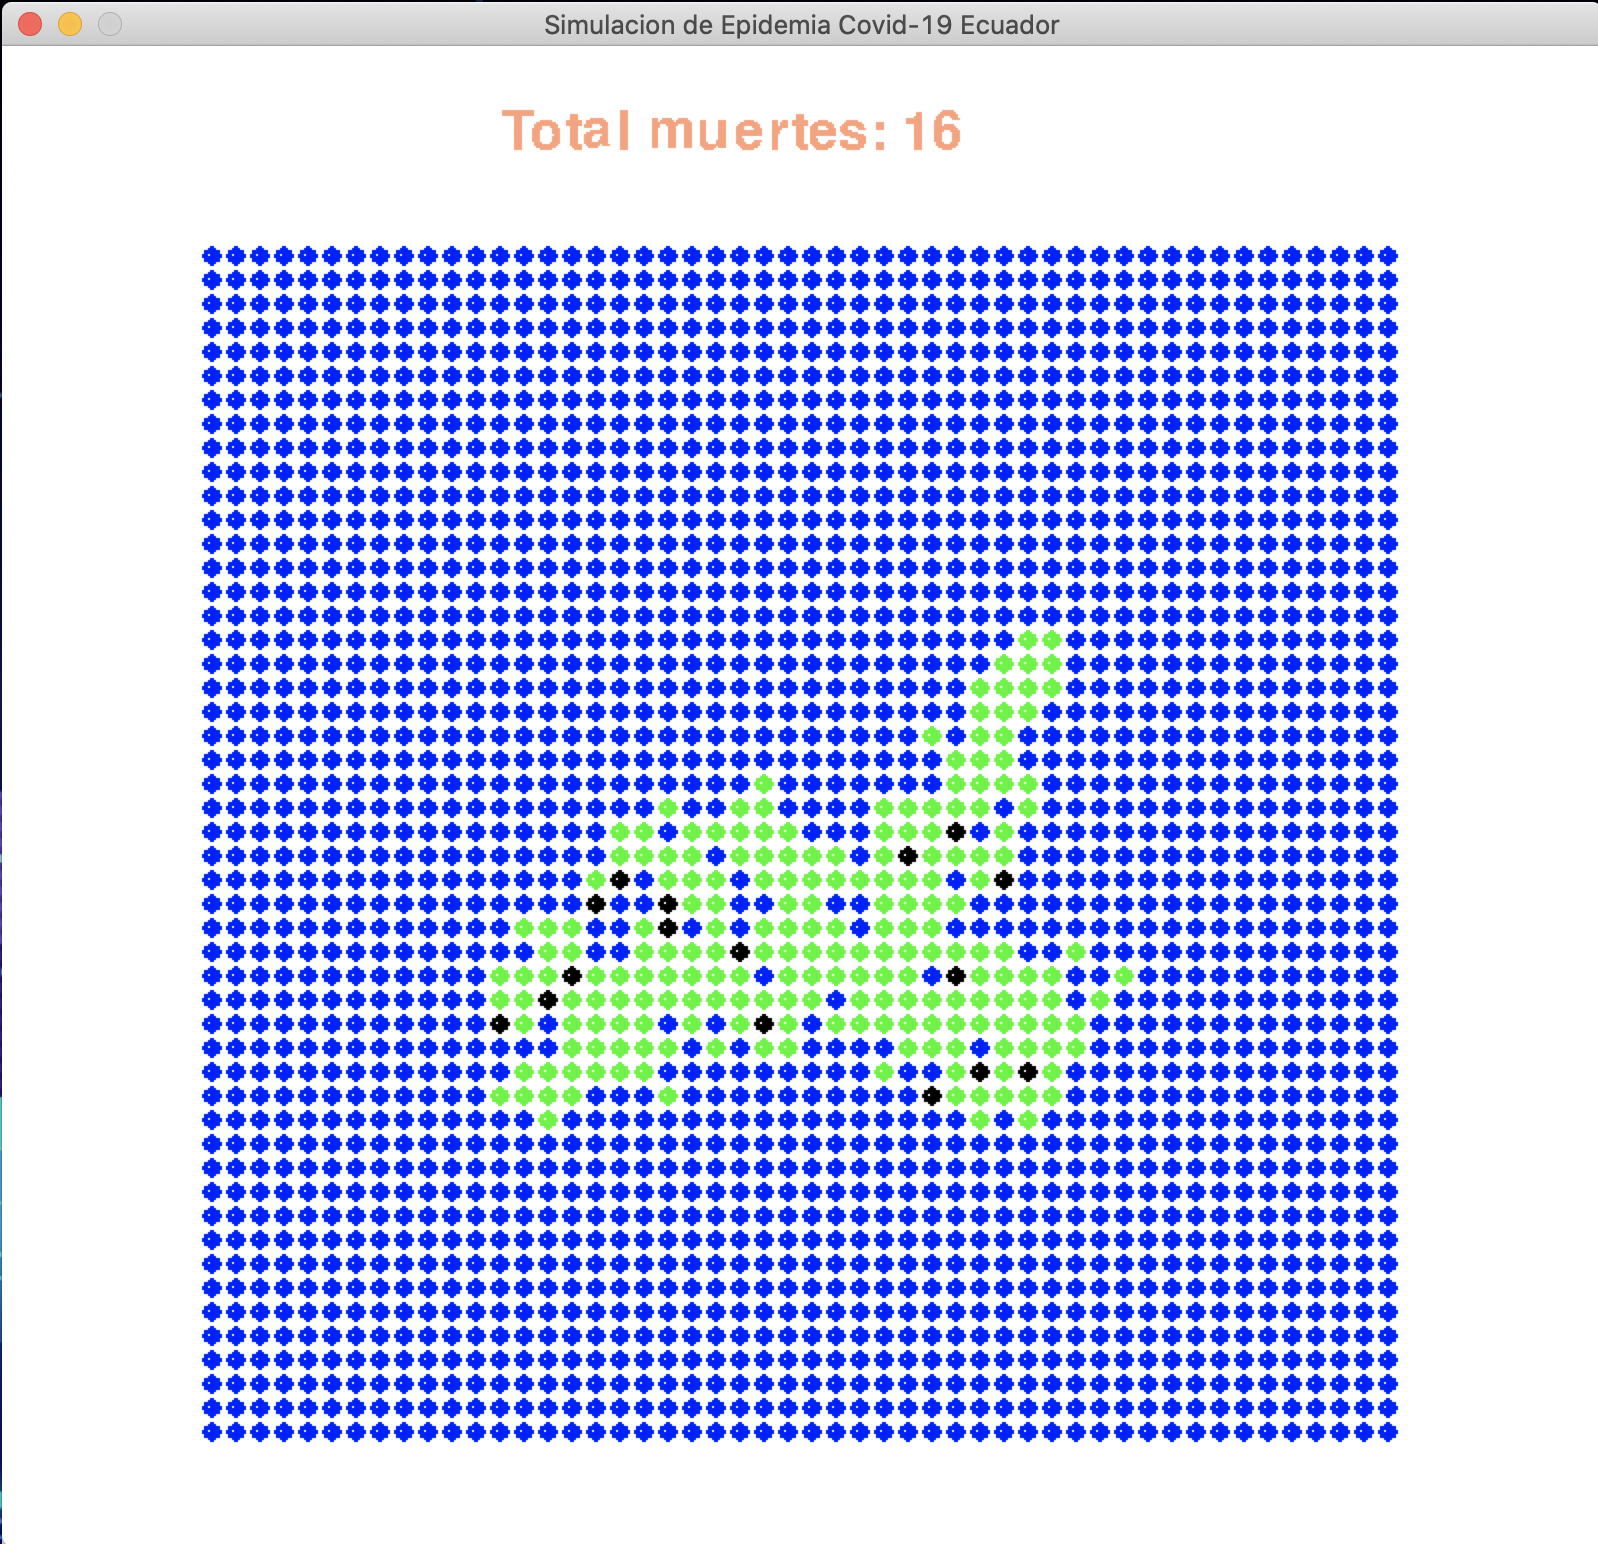

### Conclusiónes 

Una vez hechos todos los modelos, se puede apreciar que el modelo polinomial es el que se acerca más a la realidad y en cuanto a los casos confirmados.

### Ventajas y Desventajas
**Modelo Lineal**

Ventaja: Es un modelo sencillo que se puede comprender sencillamente.
Desventaja: No hay flexibilidad para futuras expansiones.

**Modelo Logistico**

Ventaja: Ayuda a tener una cierta apresiación de los casos.
Desventaja: No se ajusta a los casos existentes.

**Modelo Polinomial**

Ventaja: En el se puede apreciar que se logra acercar un poco a la predicicón y a los casos actuales, realizar predicción econométricas.
Desventaja:Puede sufrir con valores atípicos.

**Modelo Exponencial**

Ventaja: Logra predecir con gran certeza y acoplarse al numero de contagiados, realizar predicción econométricas.
Desventaja:Al ser predicciones de igual forma puede ser o arrojar algún valor erroneo.


**ADRIANA CASTILLO**
